# План рекламных компаний для магазина компьютерных игр

## Описание исследования.

Интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Выявим определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Цель исследования

Суть исследования: выявить закономерности, определяющие кспешность компьютерных игр, при помощи которых предприятие разработает стратегию взаимодействия с покуптелями.

## Задачи исследования

Для достижения поставленной уели нам необходимо провести обработку данных. Вывить определённые тенденции и закономерности.

## Исходные данные

Нам предоставлены данные до 2016 года.

## Данное исследование разделим на несколько частей:

* [Шаг 1. Откройте файл с данными и изучите общую информацию.](#1-section)
* [Шаг 2. Подготовьте данные.](#2-section)
* [Шаг 3. Проведите исследовательский анализ данных.](#3-section)
* [Шаг 4. Составьте портрет пользователя каждого региона.](#4-section)
* [Шаг 5. Проверьте гипотезы.](#5-section)
* [Шаг 6. Напишите общий вывод.](#6-section)

# Шаг 1. Откройте файл с данными и изучите общую информацию.<a id='1-section'></a>

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('D:/DS/Project/4.План рекламных компаний для магазина компьютерных игр/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Шаг 2. Подготовим данные. <a id='2-section'></a>

Проверим данные на наличие дубликатов.

Приведем названия столбцов к нижнему регистру.

In [4]:
data.columns = map(str.lower, data.columns)

In [5]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Сравним числовые значения методом `describe()`.

In [6]:
data.describe().round(2)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Удалим эти строчки так как в них,  много пропущенных значений и результат исследования не пострадает.

* Мы никак не можем заполнить пропуски в столбцах `critic_score`, `user_score`, `ratin`. Следовательно, чтобы не потерять эти данные заполним пропуски нулевым значением.
* Можно заметить, что есть пропуски у довольно старых игр, можно предложить, что в те года не собирали подобных данных. Также есть пропуски у довольно новых наблюдений. Здесь могли произойти какие-то ошибки при выгрузки системы, баги или человесеские данные.
* В переводе с английского tdb (to be determined) переводится, как предстоит определелить. То есть информация пока не доступна, скорее всего она еще обрабатывается. Поэтому изменим это значение на 0.


In [9]:
data.dropna(subset = ['name'], inplace = True)

Чтобы не удалять данные в столбце 'year_of_release' заполним их нулевым значением.

In [10]:
data['year_of_release'] = data['year_of_release'].fillna(0).astype(int)

In [11]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Рейтинг «E» («Everyone») первоначально имел другое обозначание "K-A" ("Kids to Adults"). Следовательно его можно изменить.(https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)

In [12]:
data['rating'] = data['rating'].replace('K-A', 'E')

In [13]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Данные в столбце `user_score` заполнить какими либо значениями, поэтому заполним их нулём. А значение `tbd` означает, что данные еще не определены, следовательно мы можем заменить их на ноль. 

In [14]:
data['user_score'] = data['user_score'].fillna(0)
data['user_score'] = data['user_score'].replace('tbd', 0)
data['user_score'] = pd.to_numeric(data['user_score'])

In [15]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score            0
rating             6764
dtype: int64

В столбцах `critic_score` и `rating` также замеим пропуски на ноль.

In [16]:
data['critic_score'] = data['critic_score'].fillna(0)
data['rating'] = data['rating'].fillna(0)

Подсчитаем сумарное значение продаж во всех регионах.

In [17]:
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,31.38


In [18]:
data.duplicated().sum()

0

In [19]:
duplicaterowss = data[data.duplicated(subset=['name','platform'], keep=False)]
display(duplicaterowss)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,1.17
4127,Sonic the Hedgehog,PS3,0,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,0.48
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


Для `Need for Speed: Most Wanted` дубликаты обрабатывать не надо так как эта игра выпускалась сразу для нескольких платформ и в разные годы. Игру `Sonic the Hedgehog` под индексом `4127` стоит удалить, так как там ошибка в указании года.

In [20]:
data = data.drop([4127])

**Вывод:**
- привили название столбцов к нижнему регистру;
- избавились от пропусков;
- првили данные к необходимому формату;
- убрали ненужные данные;
- посчитали суммарные продажи по регионам;
- удалили неявные дубликаты.

# Шаг 3. Проведите исследовательский анализ данных. 
<a id='3-section'></a>

Изучим сколько игр выпускалось в разные года

Text(0, 0.5, 'Кол-во игр')

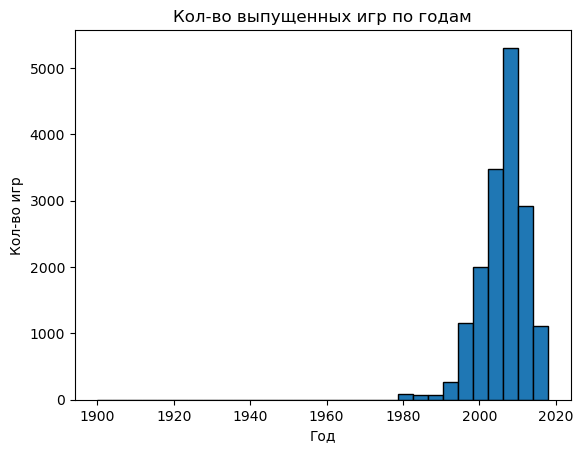

In [21]:
plt.hist(data['year_of_release'], bins=30, range=(1900,2018), edgecolor='black')
plt.title('Кол-во выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')

Исходя из графика указанного выше, видно, что нас интересуют игры вышедшие с 2000 года. Так как эти данные обладают наибольшей актуальностью. Составим график исходя из вышесказанного.

In [22]:
games_data = data.query('year_of_release >= 2000')

Text(0, 0.5, 'Количество игр')

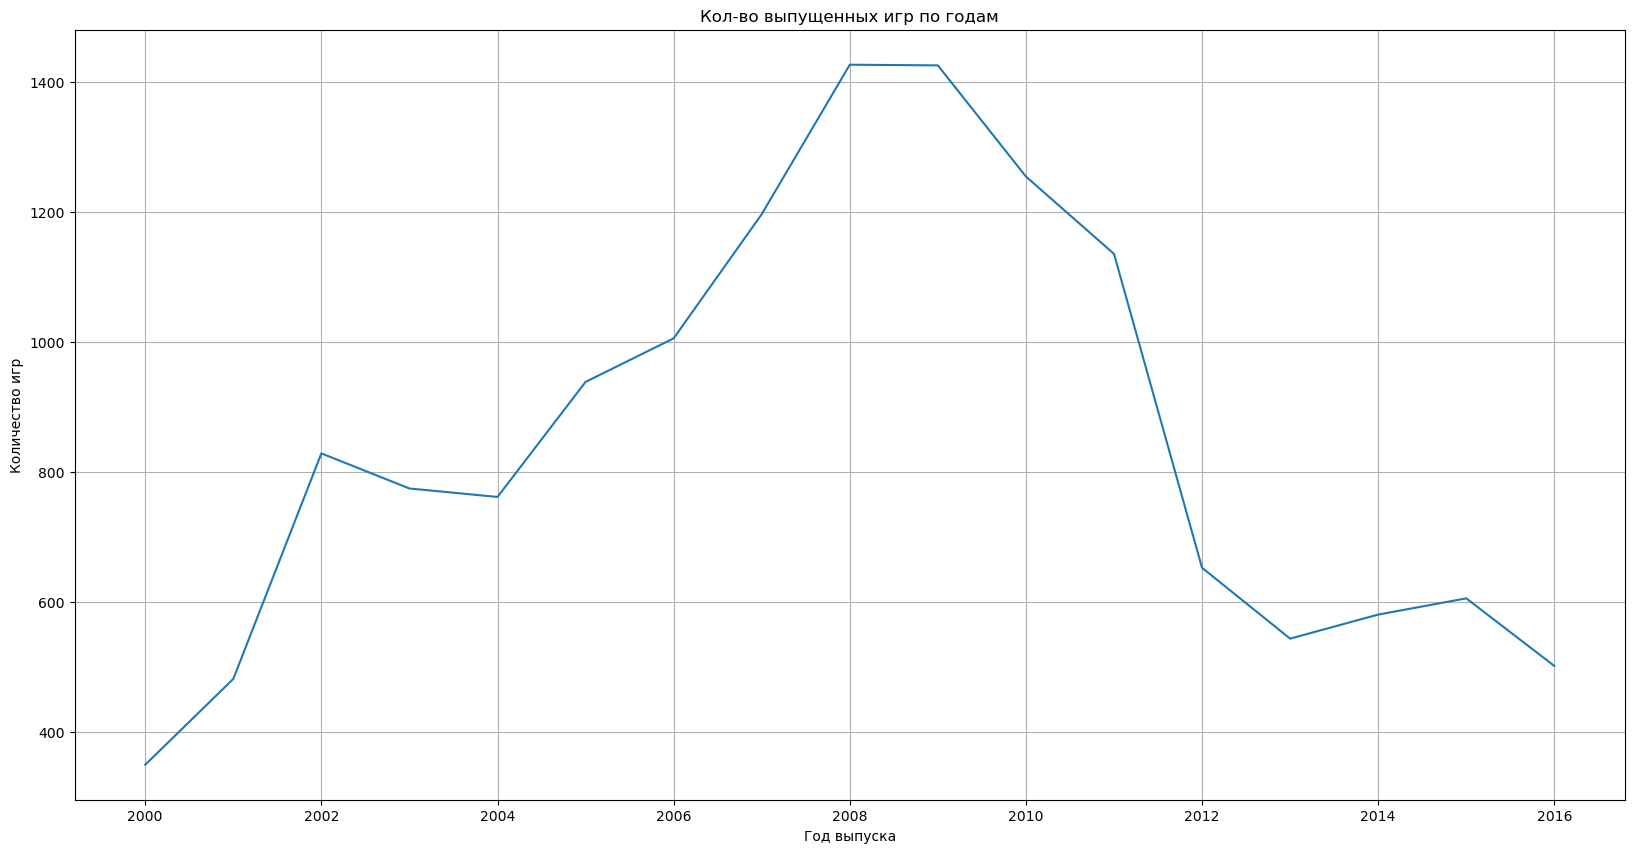

In [23]:
games_data.groupby('year_of_release')['name'].count().plot(
    figsize=(20, 10), 
    grid=True, 
    title='Кол-во выпущенных игр по годам'
)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')

Исходя из данных представленных на графике видно, что c 2006 по 2011 год активно выпускались новые видеоигры. 
Количество выпущенных игр в эти года превышала 1000 в год. А в 2008-2009 год количество игр превышало 1400.

Посмотрим за какой характерный срок появляются новые и исчезают старые платформы.

In [24]:
games_data.pivot_table(
    index='platform', 
    columns='year_of_release', 
    values='name', 
    aggfunc='count',
    fill_value='' 
)

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
3DS,,,,,,,,,,,,116.0,93.0,91.0,80.0,86.0,46.0
DC,20.0,8.0,1.0,,,,,1.0,1.0,,,,,,,,
DS,,,,,23.0,118.0,201.0,376.0,492.0,403.0,323.0,153.0,23.0,8.0,,,
GB,17.0,10.0,,,,,,,,,,,,,,,
GBA,1.0,107.0,198.0,150.0,175.0,135.0,39.0,6.0,,,,,,,,,
GC,,22.0,152.0,144.0,83.0,97.0,40.0,4.0,,,,,,,,,
N64,60.0,9.0,1.0,,,,,,,,,,,,,,
PC,7.0,15.0,19.0,33.0,30.0,37.0,52.0,62.0,76.0,107.0,90.0,139.0,61.0,38.0,47.0,50.0,54.0
PS,160.0,91.0,20.0,3.0,,,,,,,,,,,,,


Исходя из данных представленных выше, видно, что именно в 2006 году появляется больше платформ. Следовательно для дальнейшего исследования ограничем наши данные с 2014 по 2016 год.

In [25]:
games_data_new = games_data.query('year_of_release >= 2014')

### Выберем топ 10 платформ по прадажам.

In [26]:
top_platform_sales = games_data_new.groupby('platform')['all_sales'].sum()
top_platform_sales.sort_values(ascending=False).reset_index().head(10)

,platform,all_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


Самыми популярнвми платформами являются `X360` (952.99 млн.дол.), `PS3` (931.34 млн.дол.) и `Wii` (891.18 млн.дол.).

Построим график `ящик с усами` по глобальным продажам игр в разбивке по платформам.

Text(0, 0.5, 'Продажи')

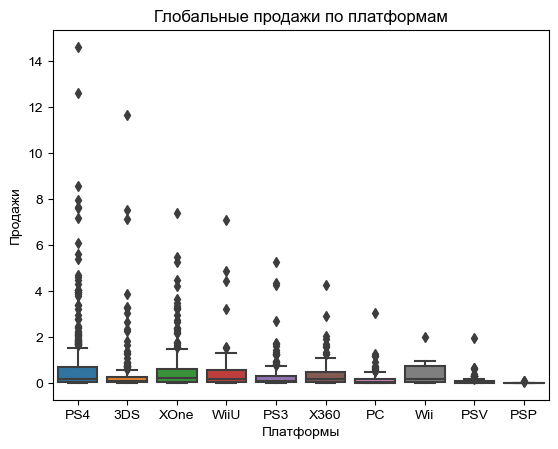

In [27]:
sns.boxplot(data = games_data_new, x='platform',y='all_sales')
sns.set(rc={'figure.figsize':(20, 10)})
plt.title('Глобальные продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи')

(1.5, 0.0)

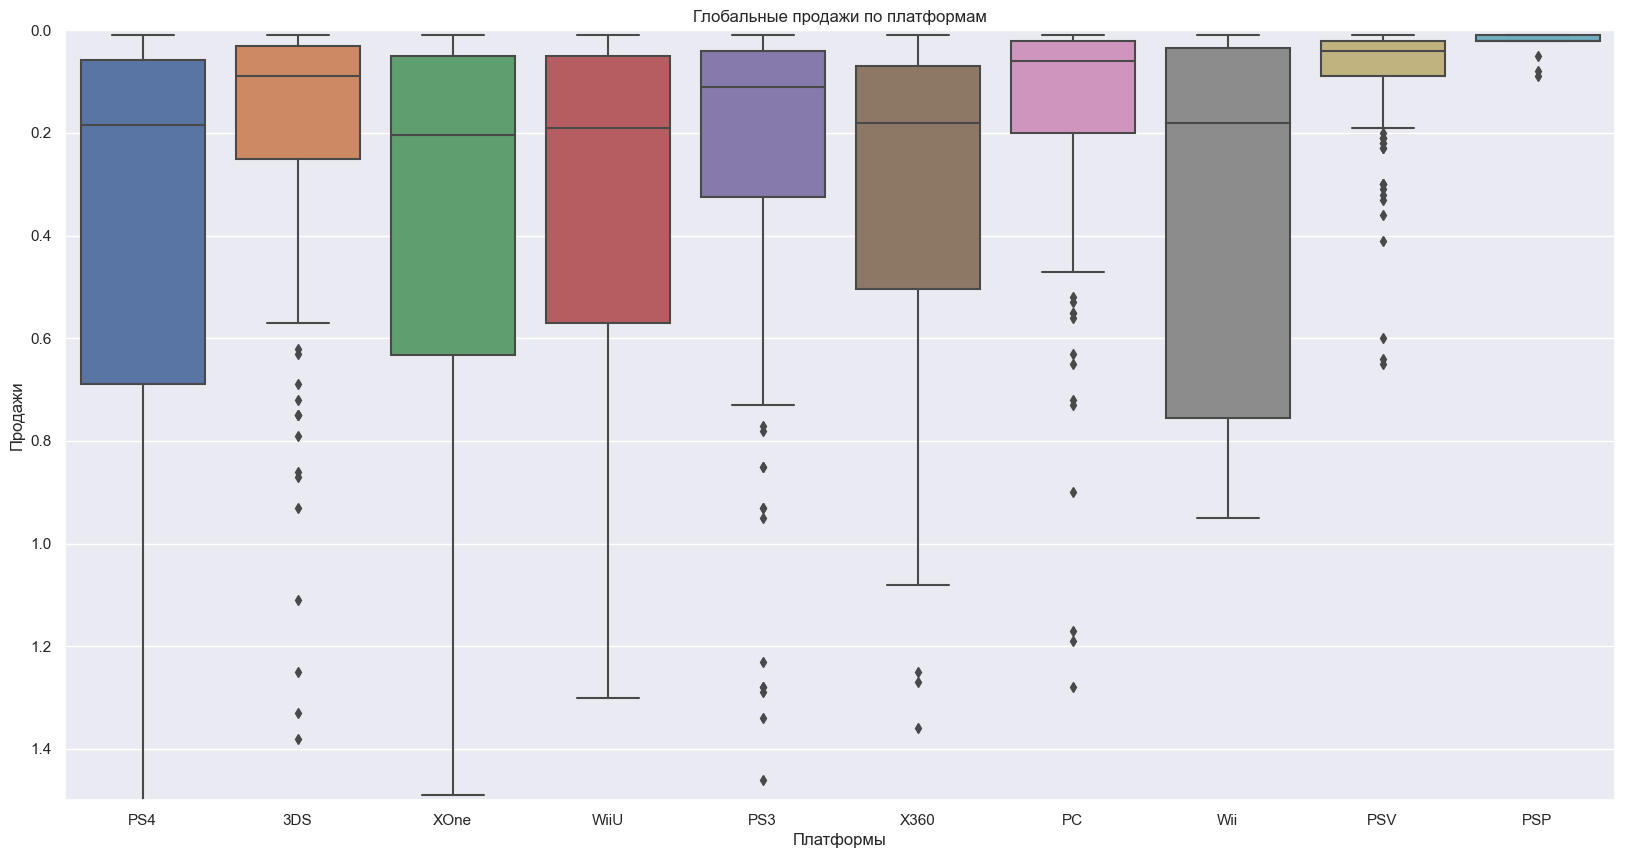

In [28]:
sns.boxplot(data = games_data_new, x='platform',y='all_sales')
sns.set(rc={'figure.figsize':(20, 10)})
plt.title('Глобальные продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.ylim(1.5,0)

In [29]:
games_data_new.describe().round(2)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,1689.00,1689.00,1689.00,1689.00,1689.00,1689.00,1689.00,1689.00
mean,2014.95,0.17,0.16,0.06,0.05,30.74,3.48,0.43
std,0.80,0.45,0.47,0.21,0.14,36.63,3.50,1.06
min,2014.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
25%,2014.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03
50%,2015.00,0.02,0.02,0.01,0.01,0.00,3.40,0.10
75%,2016.00,0.12,0.12,0.04,0.04,71.00,7.10,0.35
max,2016.00,6.03,6.31,3.18,2.38,97.00,9.30,14.63


Первый квартиль равен `0.03`, второй `0.1`, третий `0.35`. На графике также большое количество выбрасов. Разница в продажах довольно велика. 

Text(0, 0.5, 'Выручка')

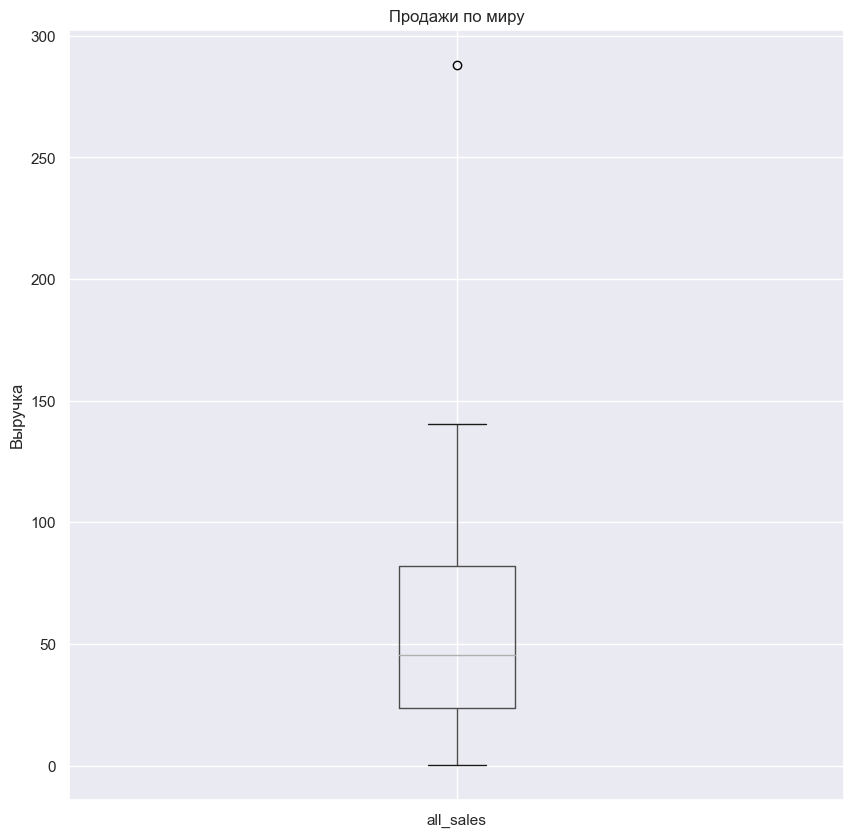

In [30]:
layout_platform = games_data_new.groupby('platform')['all_sales'].sum().reset_index()
layout_platform.boxplot('all_sales', figsize=(10,10))
plt.title('Продажи по миру')
plt.ylabel('Выручка')

Основная часть выручки приходится в промежутки от 50-400, также видим хвост из больших значений, которые однако не влияют на медиану.

Определим среднюю выручку платформ по годам.

<AxesSubplot:title={'center':'Доля выручки платформ за 20014-2016 гг.'}, ylabel='all_sales'>

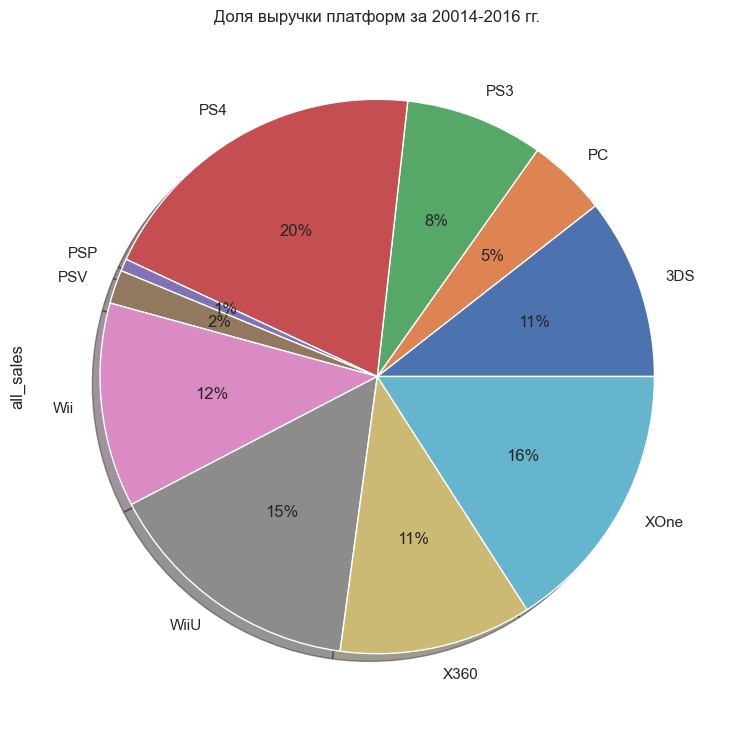

In [31]:
mean_platform_sales = games_data_new.groupby('platform')['all_sales'].mean()
mean_platform_sales.plot(
    kind='pie', 
    figsize=(9, 9), 
    autopct='%1.0f%%', 
    shadow=True, 
    title='Доля выручки платформ за 20014-2016 гг.'
)

Исходя из данных выше, можно сделать вывод. Наибольшая доля выручки у `Ps4`(20%), `XOne`(16%), `WiiU`(15%).

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

**Рассмотрим платформу `PS4`.**

In [32]:
sales_ps4 = games_data_new.query('platform == "PS4" and user_score != 0 and critic_score != 0')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


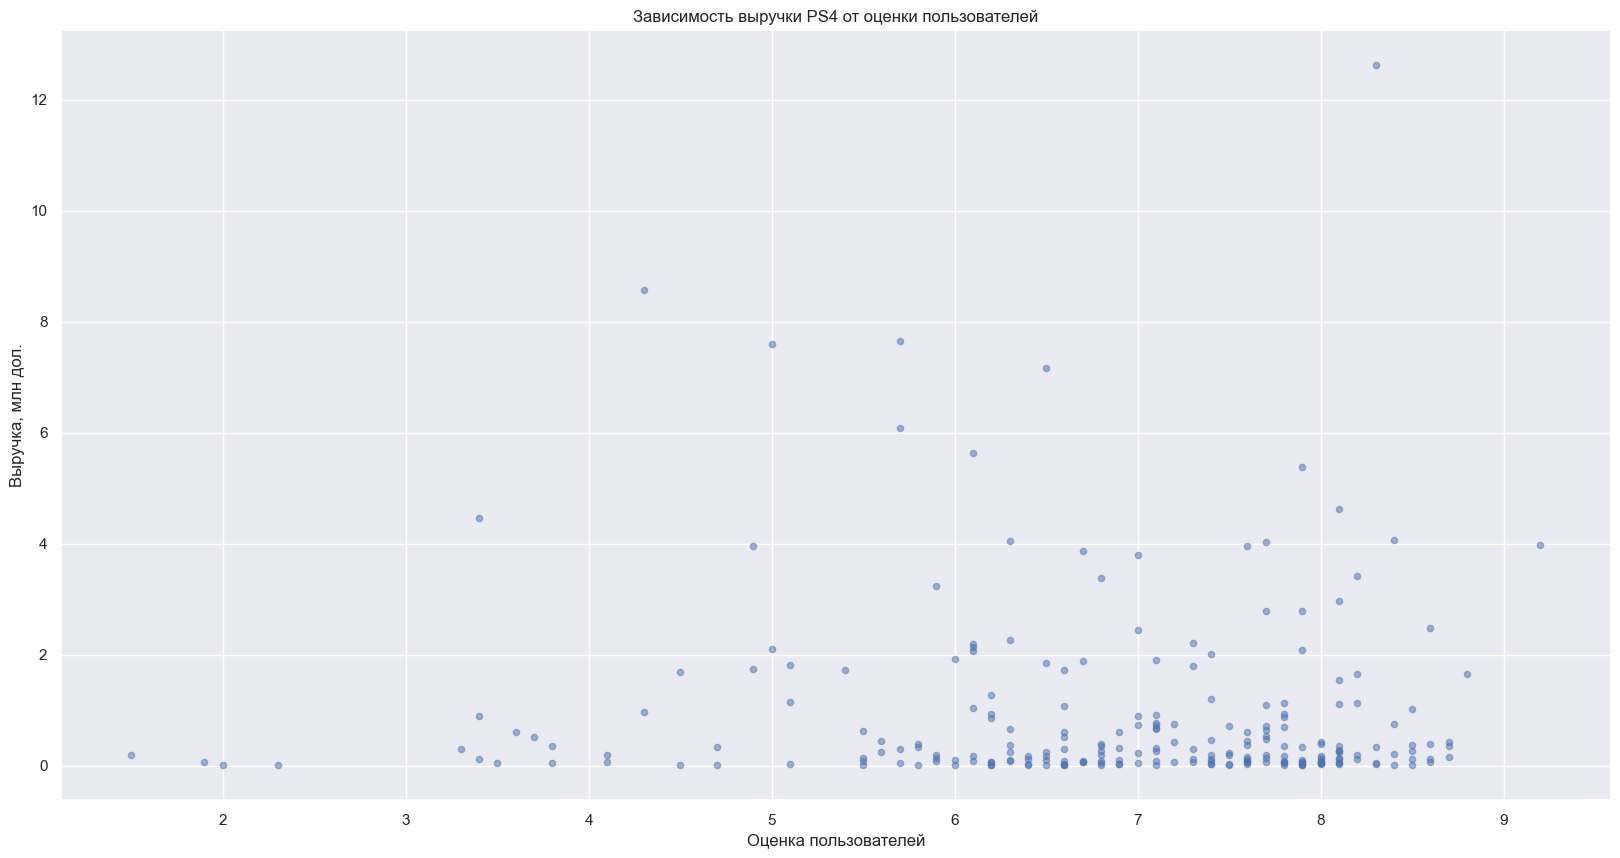

-0.04318585997193634


In [33]:
sales_ps4.plot(
    y='all_sales', 
    x='user_score', 
    kind='scatter', 
    alpha=0.5, 
    title='Зависимость выручки PS4 от оценки пользователей'
)
plt.ylabel('Выручка, млн дол.')
plt.xlabel('Оценка пользователей')
plt.show()

print(sales_ps4['all_sales'].corr(sales_ps4['user_score']))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


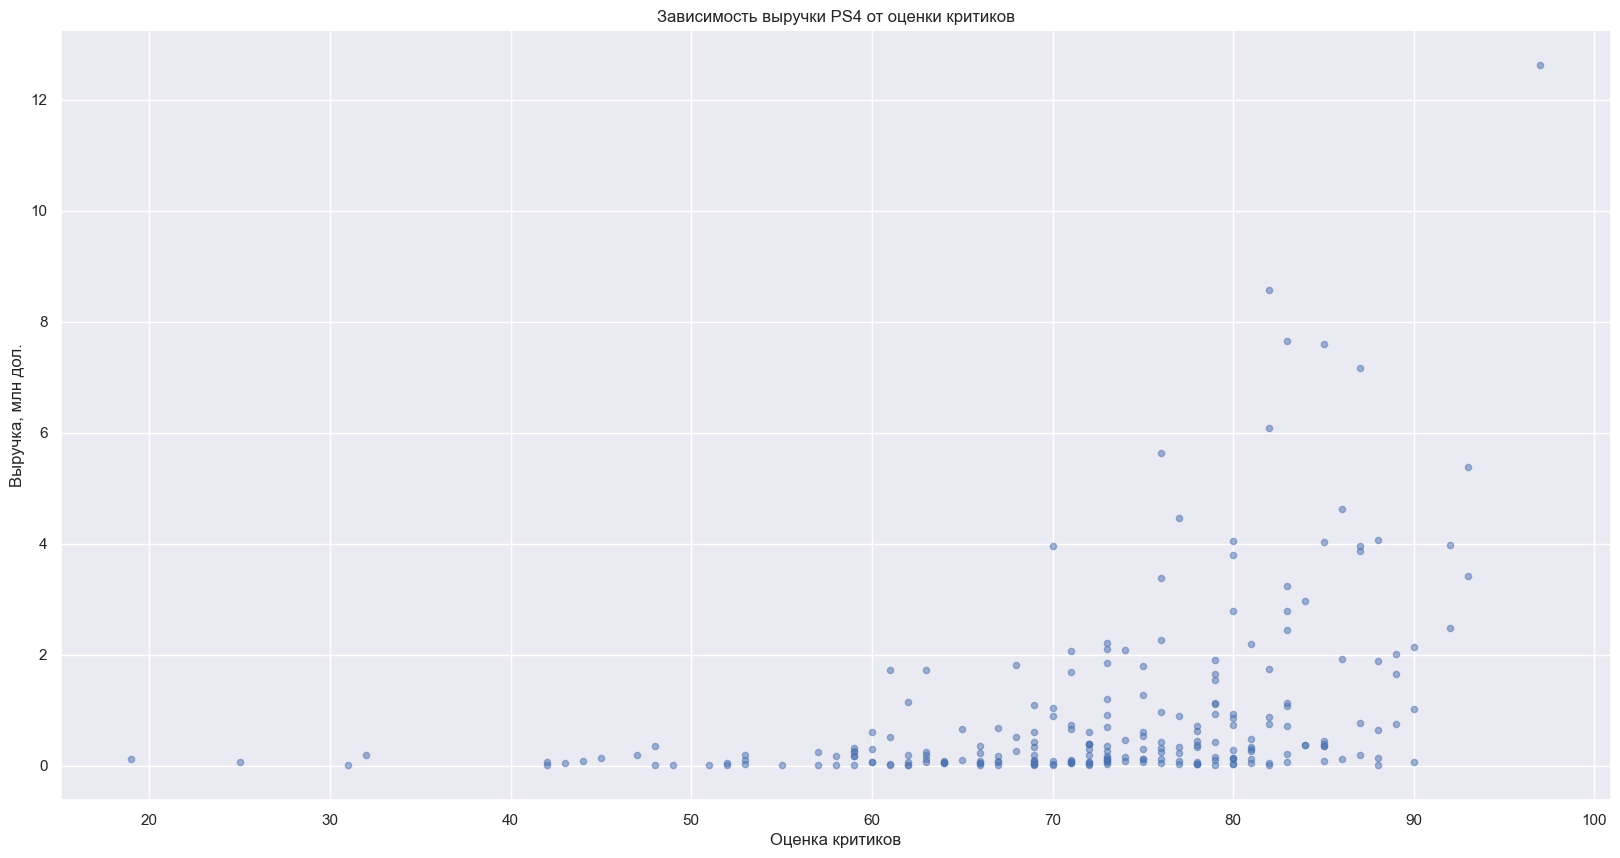

0.40190287811475334


In [34]:
sales_ps4.plot(
    y='all_sales', 
    x='critic_score', 
    kind='scatter', 
    alpha=0.5, 
    title='Зависимость выручки PS4 от оценки критиков')
plt.ylabel('Выручка, млн дол.')
plt.xlabel('Оценка критиков')
plt.show()

print(sales_ps4['all_sales'].corr(sales_ps4['critic_score']))

Оценки критиков демонстрируют прямую, средне-слабую корреляцию с 0,3-0,4 продаж. Оценки пользователей корреляции с продажами не имеют. Больше всего продаж при оценки критиков от 70 и выше. 

Соотнесём выводы с продажами игр на других платформах.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'Оценка пользователей')

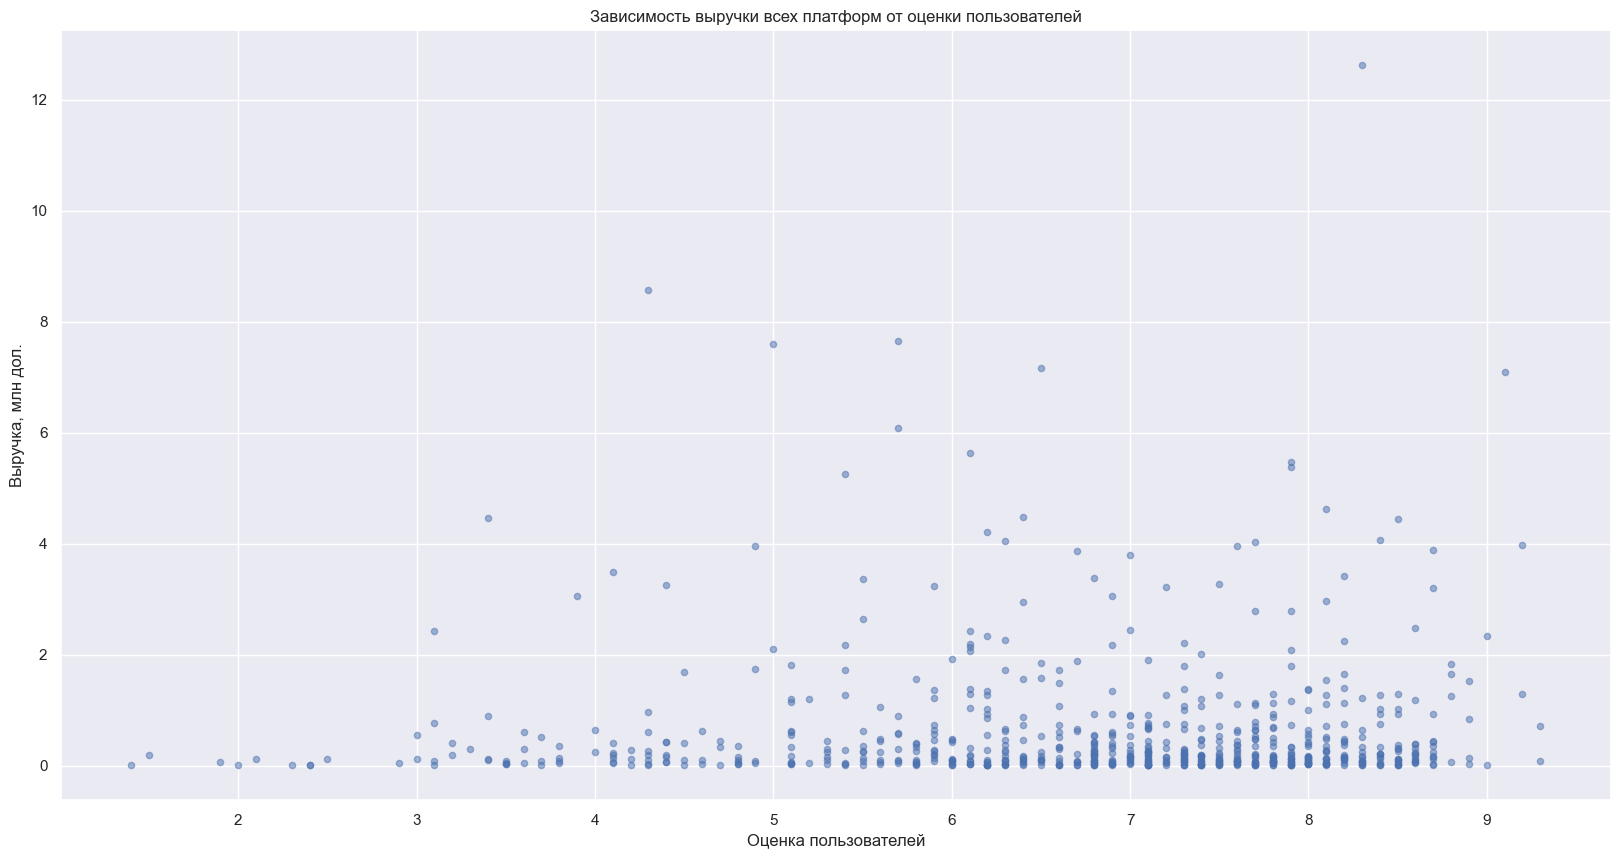

In [35]:
all_platform_sales = games_data_new.query('user_score != 0 and critic_score != 0')
all_platform_sales.plot(
    y='all_sales', 
    x='user_score', 
    kind='scatter', 
    alpha=0.5, 
    title='Зависимость выручки всех платформ от оценки пользователей'
)
plt.ylabel('Выручка, млн дол.')
plt.xlabel('Оценка пользователей')

**Рассмотрим другую платформу `XOne`.**

In [36]:
sales_xone = games_data_new.query('platform == "XOne" and user_score != 0 and critic_score != 0')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


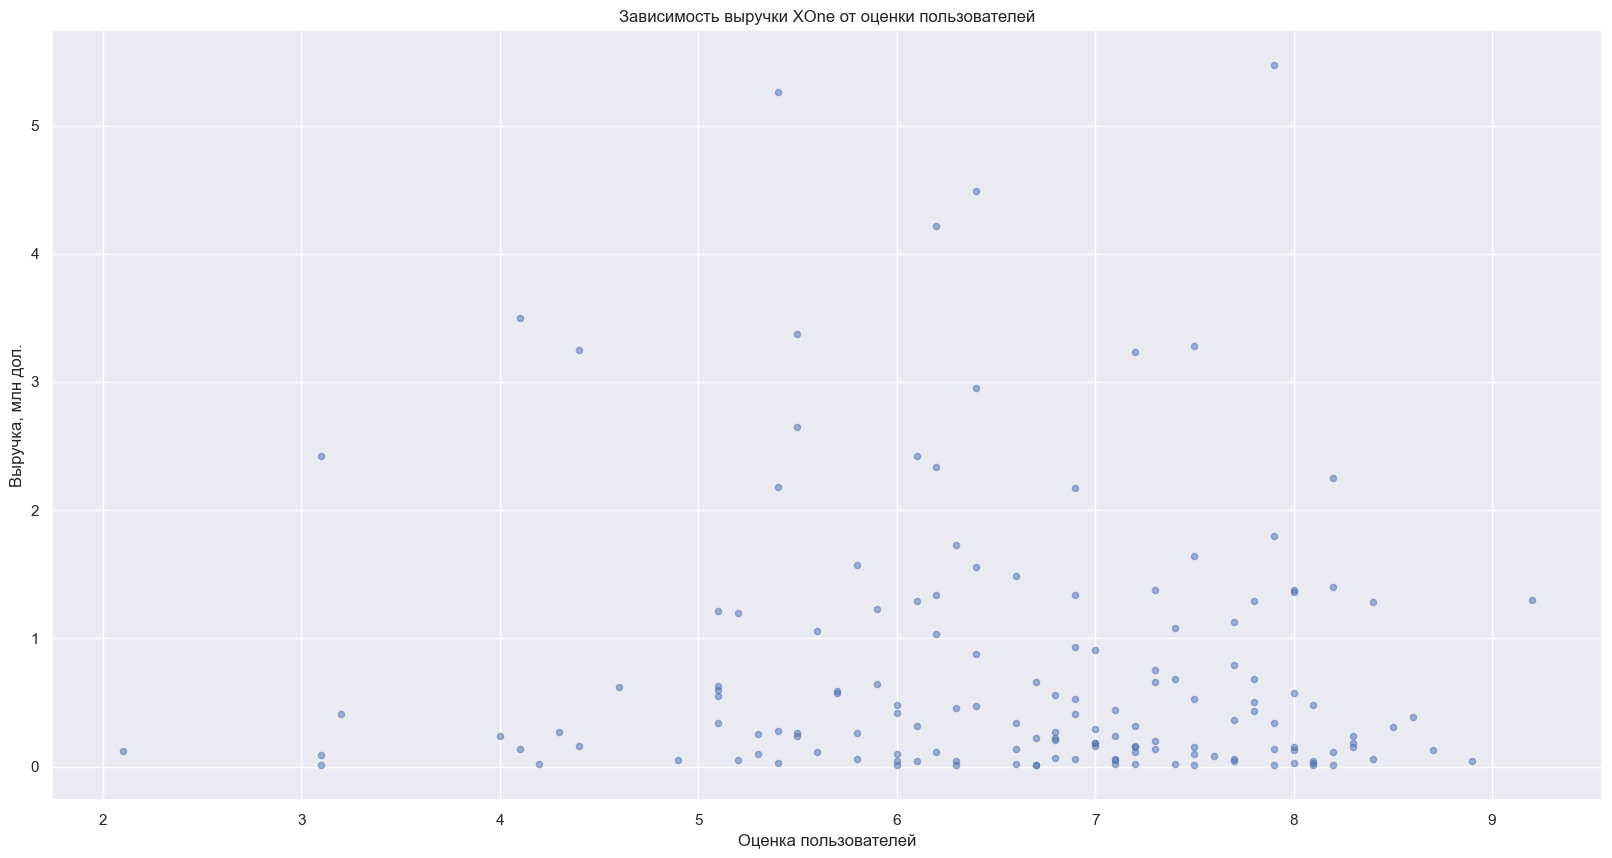

-0.09173434503310748


In [37]:
sales_xone.plot(
    y='all_sales', 
    x='user_score', 
    kind='scatter', 
    alpha=0.5, 
    title='Зависимость выручки XOne от оценки пользователей'
)
plt.ylabel('Выручка, млн дол.')
plt.xlabel('Оценка пользователей')
plt.show()

print(sales_xone['all_sales'].corr(sales_xone['user_score']))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


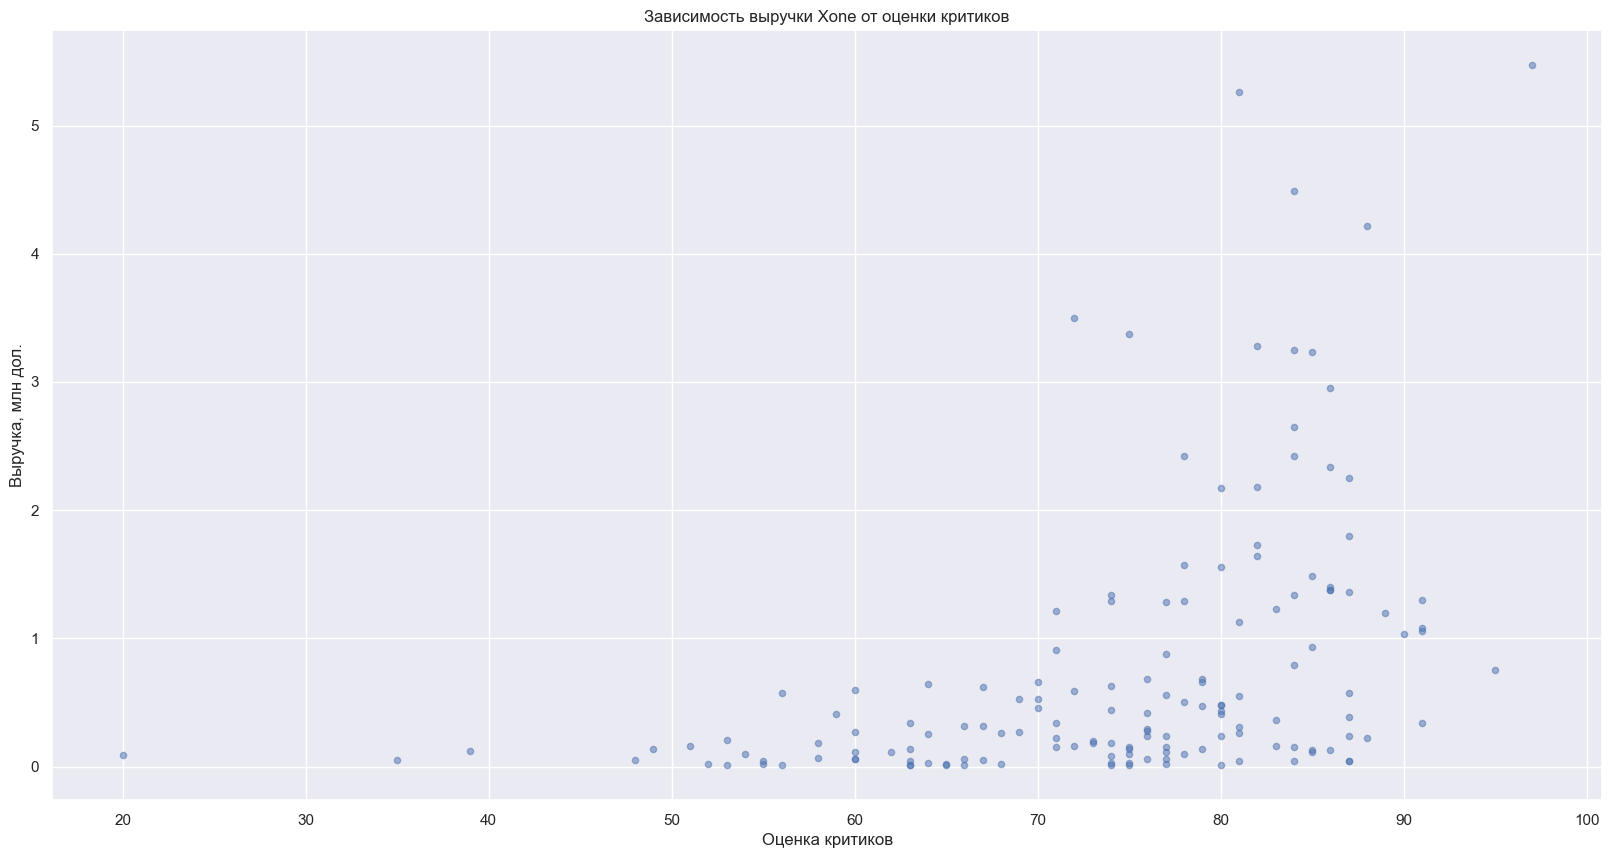

0.4221118510555765


In [38]:
sales_xone.plot(
    y='all_sales', 
    x='critic_score', 
    kind='scatter', 
    alpha=0.5, 
    title='Зависимость выручки Xone от оценки критиков')
plt.ylabel('Выручка, млн дол.')
plt.xlabel('Оценка критиков')
plt.show()

print(sales_xone['all_sales'].corr(sales_xone['critic_score']))

**Для большей точности результата рассмотрим `WiiU`.**

In [39]:
sales_wiiu = games_data_new.query('platform == "WiiU"and user_score != 0 and critic_score != 0')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


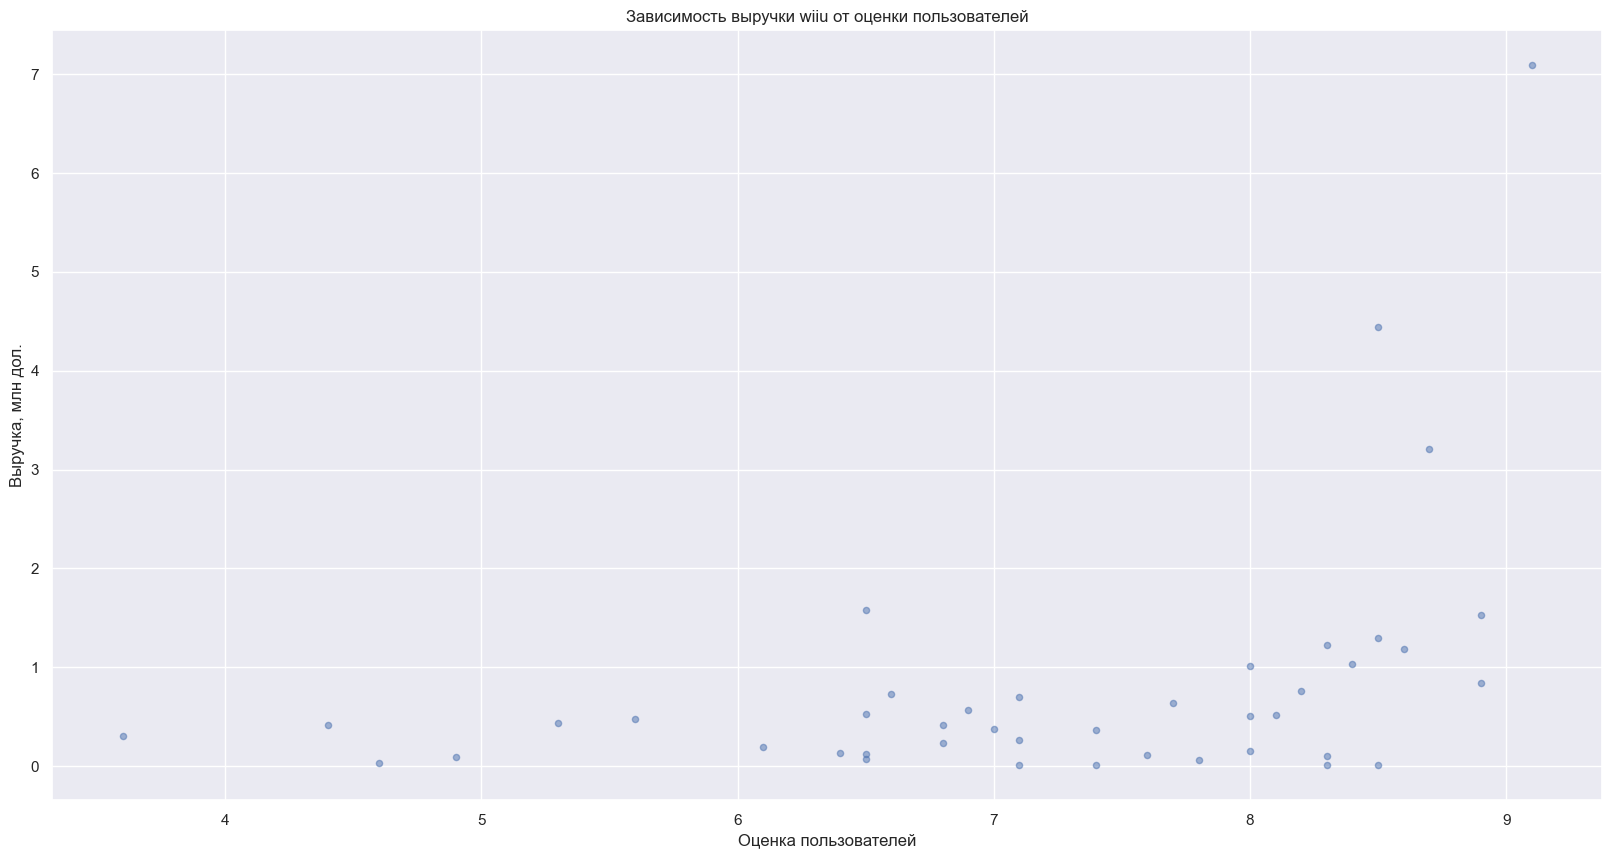

0.4114513876908575


In [40]:
sales_wiiu.plot(
    y='all_sales', 
    x='user_score', 
    kind='scatter', 
    alpha=0.5, 
    title='Зависимость выручки wiiu от оценки пользователей'
)
plt.ylabel('Выручка, млн дол.')
plt.xlabel('Оценка пользователей')
plt.show()

print(sales_wiiu['all_sales'].corr(sales_wiiu['user_score']))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


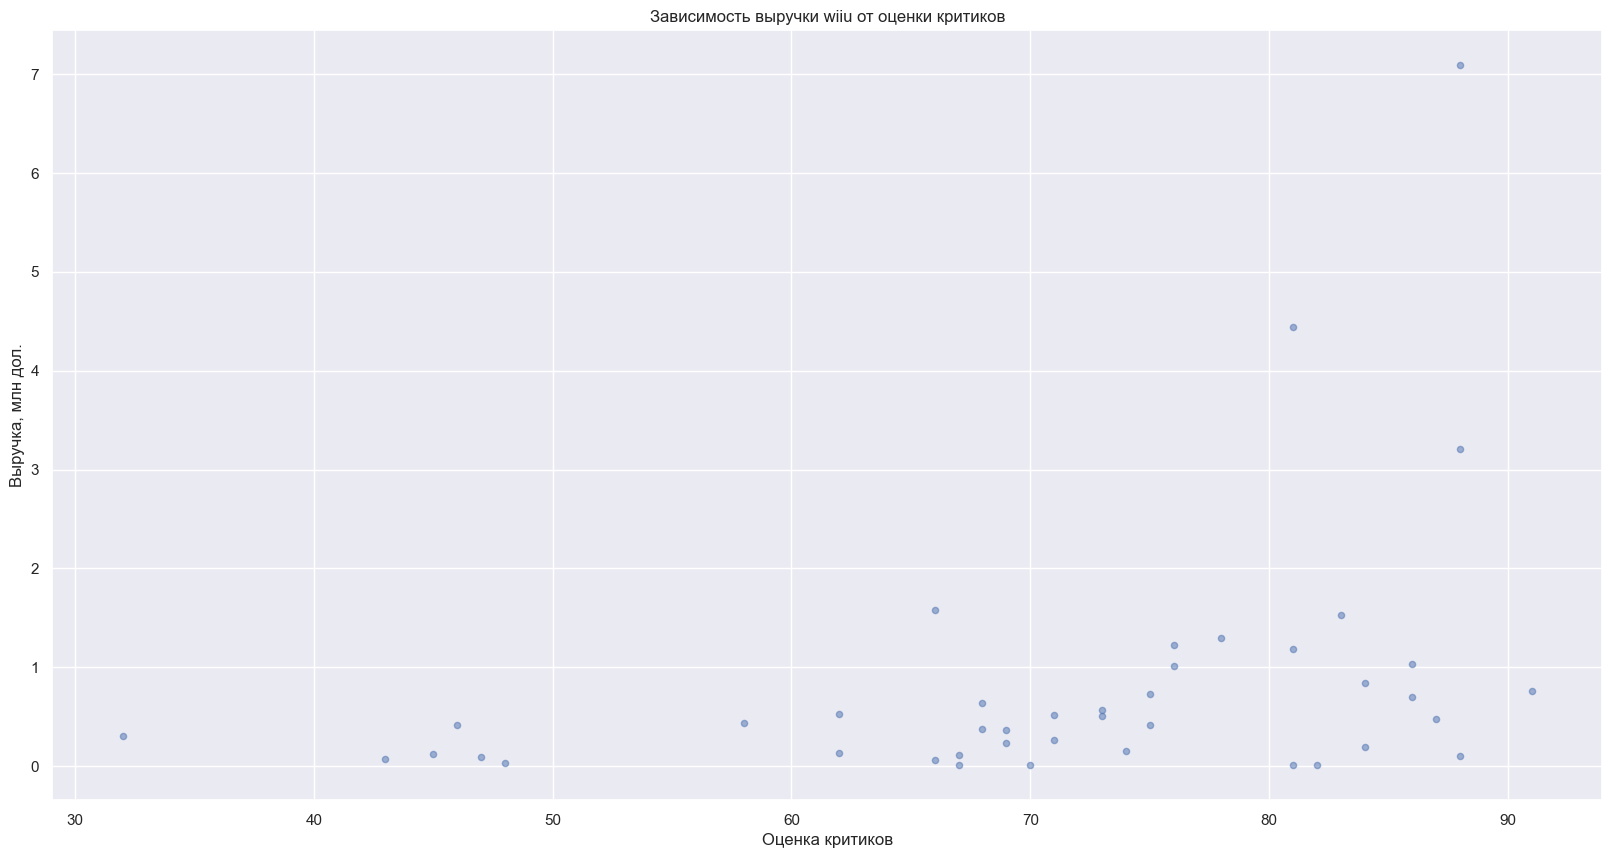

0.3756402218389979


In [41]:
sales_wiiu.plot(
    y='all_sales',
    x='critic_score', 
    kind='scatter', 
    alpha=0.5, 
    title='Зависимость выручки wiiu от оценки критиков'
)
plt.ylabel('Выручка, млн дол.')
plt.xlabel('Оценка критиков')
plt.show()

print(sales_wiiu['all_sales'].corr(sales_wiiu['critic_score']))

У платформы `WiiU` разница в корреляциях совсем небольшая. Для платформы `Xone` она заметнее.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


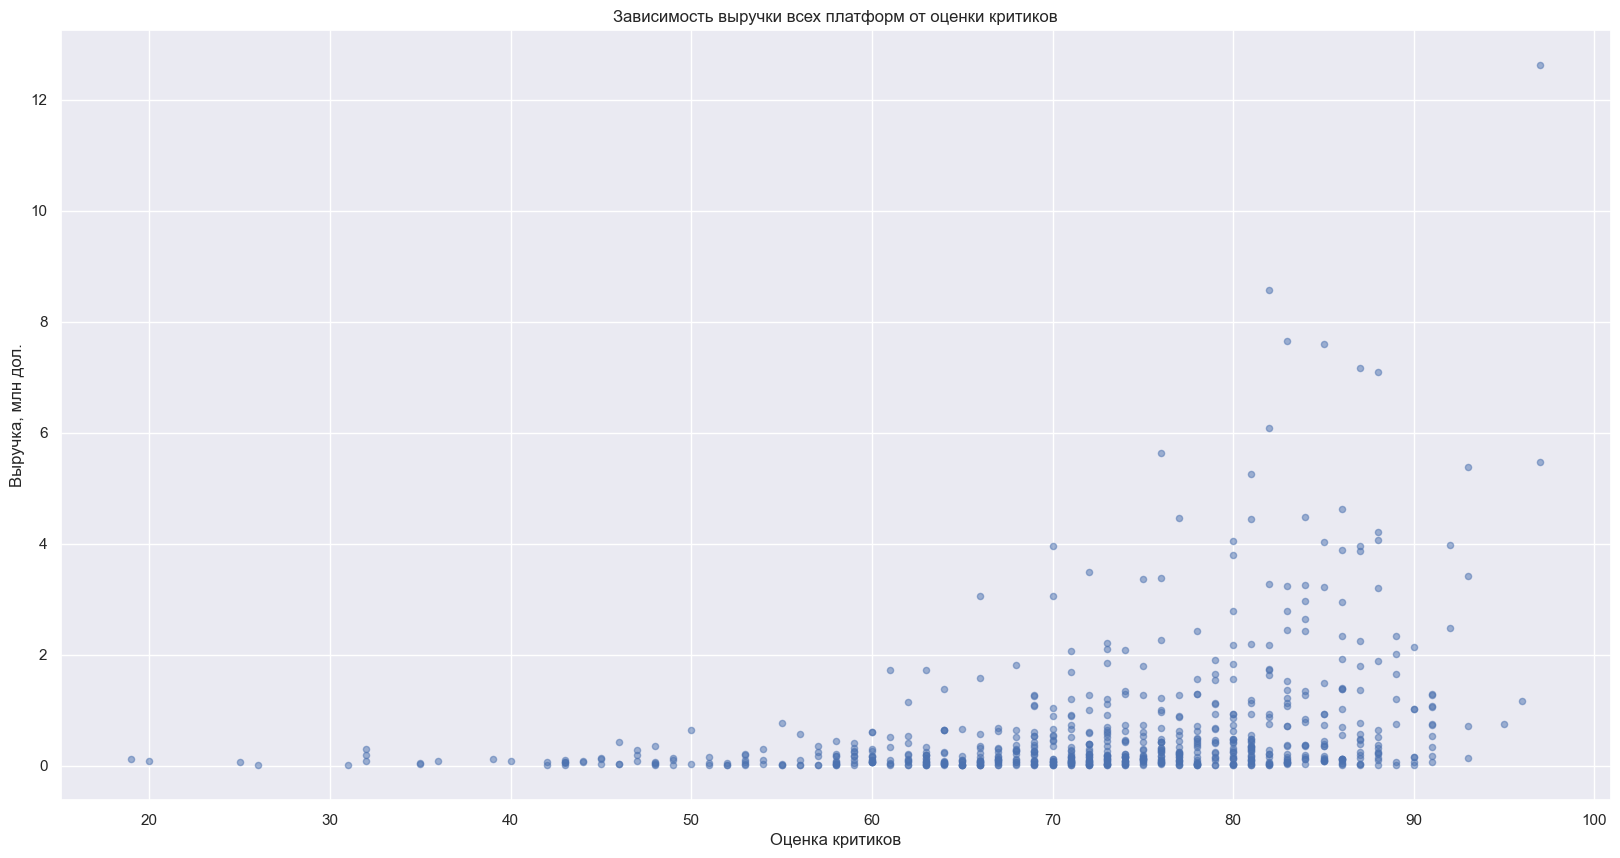

0.3253626120075885


In [43]:
all_platform_sales = games_data_new.query('user_score != 0 and critic_score != 0')
all_platform_sales.plot(
    y='all_sales', 
    x='critic_score', 
    kind='scatter', 
    alpha=0.5, 
    title='Зависимость выручки всех платформ от оценки критиков')
plt.ylabel('Выручка, млн дол.')
plt.xlabel('Оценка критиков')
plt.show()

print(all_platform_sales['all_sales'].corr(all_platform_sales['critic_score']))

Разница в корреляции оценка критика/выручка и оценка пользователя/выручка совсем небольшая. Для платформы `PS4` она заметнее, а корреляция оценка критика/выручка сильнее.

### Рассмотрим медианные продажи по жанрам.

In [44]:
sales_genre = games_data_new.pivot_table(
    index='genre', 
    values='all_sales', 
    aggfunc='mean'
).sort_values(by='all_sales', 
              ascending=False
)

sales_genre = sales_genre.rename(columns={'all_sales':'Продажи'})
sales_genre.index.name =  'Жанр'

display(sales_genre.round(4)*1000)

,Продажи
Жанр,
Shooter,1335.5
Sports,680.0
Platform,476.1
Fighting,470.3
Role-Playing,459.0
Racing,398.8
Misc,332.3
Action,322.1
Simulation,298.4


Лидирует жанр `Shooter`(1335.5 млн.дол.), `Sports`(680 млн.дол.) и `Platform`(476.1млн.дол.). Десятку лидеров закрывает `Adventure`(94.9 млн.дол.).

# Шаг 4. Составьте портрет пользователя каждого региона. <a id='4-section'></a>

### Северная Америка(NA)

**Популярные платформы в Северной Америки**

In [45]:
platform_na = games_data_new.pivot_table(
    index='platform',
    values='na_sales',
    aggfunc='sum').sort_values(
    by='na_sales',
    ascending=False
)

platform_na = platform_na.rename(columns={'na_sales':'Продажи'})
platform_na.index.name =  'Платформа'

display(platform_na)

,Продажи
Платформа,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


**Популярные Жанры в Северной Америки**

In [46]:
genre_na = games_data_new.pivot_table(
    index='genre',
    values='na_sales',
    aggfunc='sum').sort_values(
    by='na_sales',
    ascending=False
)

genre_na = platform_na.rename(columns={'na_sales':'Продажи'})
genre_na.index.name =  'Жанр'

display(genre_na)

,Продажи
Жанр,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


**Популярные рейтинги в Северной Америки**

In [47]:
rating_na = games_data_new.pivot_table(
    index='rating',
    values='na_sales',
    aggfunc='sum').sort_values(
    by='na_sales', 
    ascending=False
)

rating_na = rating_na.rename(columns={'na_sales':'Продажи'})
rating_na.index.name =  'Рейтинг'

display(rating_na)

,Продажи
Рейтинг,
M,96.42
0,64.72
E,50.74
T,38.95
E10+,33.23


**В Северной Америке:**
* лидируют такие платформы, как X360, Wii и PS3;
* смые популярные жанры  Action, Sports и Shooter;
* лмдуруют рейтинги M, buhs ,игры без рейтинга и E.

### Европа(EU)

**Популярные платформы в Европе**

In [48]:
platform_eu = games_data_new.pivot_table(
    index='platform',
    values='eu_sales',
    aggfunc='sum').sort_values(
    by='eu_sales', 
    ascending=False
)

platform_eu = platform_eu.rename(columns={'eu_sales':'Продажи'})
platform_eu.index.name =  'Платформа'

display(platform_eu)

,Продажи
Платформа,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


**Популярные Жанры в Европе**

In [49]:
genre_eu = games_data_new.pivot_table(
    index='genre',
    values='eu_sales',
    aggfunc='sum').sort_values(
    by='eu_sales', 
    ascending=False
)

genre_eu = genre_eu.rename(columns={'eu_sales':'Продажи'})
genre_eu.index.name =  'Жанр'

display(genre_eu)

,Продажи
Жанр,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13
Misc,12.86
Simulation,7.30
Platform,6.80
Fighting,6.69


**Популярные рейтинги в Европе**

In [50]:
rating_eu = games_data_new.pivot_table(
    index='rating',
    values='eu_sales',
    aggfunc='sum').sort_values(
    by='eu_sales', 
    ascending=False
)

rating_eu = platform_eu.rename(columns={'eu_sales':'Продажи'})
rating_eu.index.name =  'Рейтинг'

display(rating_eu)

,Продажи
Рейтинг,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


**В Европе:**
* лидируют такие платформы, как PS3, X360 и Wii;
* смые популярные жанры  Action, Sports и Shooter;
* лмдуруют рейтинги M, игры без рейтинга и E.

### Япония(JP)

In [51]:
platform_jp = games_data_new.pivot_table(
    index='platform',
    values='jp_sales',
    aggfunc='sum').sort_values(
    by='jp_sales', 
    ascending=False
)

platform_jp = platform_eu.rename(columns={'jp_sales':'Продажи'})
platform_jp.index.name =  'Платформы'

display(platform_jp)

,Продажи
Платформы,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


In [52]:
genre_jp = games_data_new.pivot_table(
    index='genre',
    values='jp_sales',
    aggfunc='sum').sort_values(
    by='jp_sales', 
    ascending=False
)

genre_jp = platform_eu.rename(columns={'jp_sales':'Продажи'})
genre_jp.index.name =  'Жанр'

display(genre_jp)

,Продажи
Жанр,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


In [53]:
rating_jp = games_data_new.pivot_table(
    index='rating',
    values='jp_sales',
    aggfunc='sum').sort_values(
    by='jp_sales', 
    ascending=False
)

rating_jp = platform_eu.rename(columns={'jp_sales':'Продажи'})
rating_jp.index.name =  'Рейтинг'

display(rating_jp)

,Продажи
Рейтинг,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


**В Японии:**
* лидируют такие платформы, как DS, 3DS и PS3;
* смые популярные жанры  Role-Playing, Action и Misc;
* лидуруют игры без рейтинга, T и Е.

В Японии не прибегают к использованию рейтинга `ESRB`, вместо него используют своё внутреннее агенство `CERO`.

### Другие страны(other)

In [54]:
platform_other = games_data_new.pivot_table(
    index='platform',
    values='other_sales',
    aggfunc='sum').sort_values(
    by='other_sales', 
    ascending=False
)

platform_other = platform_eu.rename(columns={'other_sales':'Продажи'})
platform_other.index.name =  'Платформа'

display(platform_other)

,Продажи
Платформа,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


In [55]:
genre_other = games_data_new.pivot_table(
    index='genre',
    values='other_sales',
    aggfunc='sum').sort_values(
    by='other_sales', 
    ascending=False
)

genre_other = platform_eu.rename(columns={'other_sales':'Продажи'})
genre_other.index.name =  'Жанр'

display(genre_other)

,Продажи
Жанр,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


In [56]:
rating_other = games_data_new.pivot_table(
    index='rating',
    values='other_sales',
    aggfunc='sum').sort_values(
    by='other_sales', 
    ascending=False
)

rating_other = platform_eu.rename(columns={'other_sales':'Продажи'})
rating_other.index.name =  'Рейтинг'

display(rating_other)

,Продажи
Рейтинг,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


В других странах:
* лидируют такие платформы, как PS3, X360 и Wii;
* самые популярные жанры  Action, Sports и Shooter;
* лмдуруют рейтинги M, игры без рейтинга и E.

# Шаг 5. Проверьте гипотезы. <a id='5-section'></a>

Cформулировали нулевую и альтернативную гипотезу для утверждения о том, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.

H0 - средние пользовательские рейтинги платформ `Xbox One` и `PC` равны;

H0 - средние пользовательские рейтинги платформ `Xbox One` и `PC` не равны.

In [57]:
xbox_one = all_platform_sales.query('platform == "XOne"')

pc = all_platform_sales.query('platform == "PC"')

alpha = .05

results = st.ttest_ind(
    xbox_one['user_score'],
    pc['user_score'],
)

print('p-значение:', results.pvalue.round(2))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг платформы Xbox One', round(xbox_one['user_score'].mean(),2))
print('Cредний пользовательский рейтинг платформы PC', round(pc['user_score'].mean(), 2))

p-значение: 0.13
Не получилось отвергнуть нулевую гипотезу

Cредний пользовательский рейтинг платформы Xbox One 6.62
Cредний пользовательский рейтинг платформы PC 6.34


Cформулируем нулевую и альтернативную гипотезу для утверждения о том, что cредние пользовательские рейтинги жанров `Action` (англ. «действие», экшен-игры) и `Sports` (англ. «спортивные соревнования») разные.

H0 - что cредние пользовательские рейтинги жанров `Action` (англ. «действие», экшен-игры) и `Sports` (англ. «спортивные соревнования») равны;
H0 - что cредние пользовательские рейтинги жанров `Action` (англ. «действие», экшен-игры) и `Sports` (англ. «спортивные соревнования») не равны.

In [59]:
action = all_platform_sales.query('genre == "Action"')

sports = all_platform_sales.query('genre == "Sports"')

results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
)

print('p-значение:', results.pvalue.round(10))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг жанра Action', round(action['user_score'].mean(), 2))
print('Cредний пользовательский рейтинг жанра Sports', round(sports['user_score'].mean(), 2))

p-значение: 4e-10
Отвергаем нулевую гипотезу

Cредний пользовательский рейтинг жанра Action 6.83
Cредний пользовательский рейтинг жанра Sports 5.68


**Вывод:** отвергаем обе теории

    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

# Шаг 6. Общий вывод. <a id='6-section'></a>

Исходя из проделанного исследования о продажи игр по всему миру можно сделать следущие выводы:
   * 1.Вывели 10 платформ лидеров по продажам c 2014 по 2016 год(PS4, XOne, WiiU, Wii, X360, 3DS, PS3, PC, PSV, PSP).
   * 2.Больше всего продаж игр продавалось с 2006 по 2011 год.
   * 3.Оценки критиков демонстрируют прямую, средне-слабую корреляцию с 0,3-0,4 продаж. Оценки пользователей корреляции с продажами не имеют. Больше всего продаж при оценки критиков от 70 и выше.
   * 4.Наиболее доходными жанрами являются Shooter и Sports.
   * 5.Проверили две гипотезы:
        Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
        Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
        И отвергли их.

**Выделим две актуальные рекламные компании:**
   * Направлена на Европу, игравая платформа PS3, жанр экшн, рейтинг М.
   * Направлена на Северную Америку, платформа X360, жанр экшн, рейтинг M.